# Sentiment Analysis and Stock Price Prediction

In [61]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [62]:
#reading the DJI
df=pd.read_csv('SP_DJI_Dataset_v2.csv')
df

,Date,Open,Close,High,Low,Volume
0,2008-08-07 00:00:00-04:00,1286.510010,1266.069946,1286.510010,1264.290039,5319380000
1,2008-08-08 00:00:00-04:00,1266.290039,1296.319946,1297.849976,1262.109985,4966810000
2,2008-08-11 00:00:00-04:00,1294.420044,1305.319946,1313.150024,1291.410034,5067310000
3,2008-08-12 00:00:00-04:00,1304.790039,1289.589966,1304.790039,1285.640015,4711290000
4,2008-08-13 00:00:00-04:00,1288.640015,1285.829956,1294.030029,1274.859985,4787600000
...,...,...,...,...,...,...
1983,2016-06-23 00:00:00-04:00,2092.800049,2113.320068,2113.320068,2092.800049,3297940000
1984,2016-06-24 00:00:00-04:00,2103.810059,2037.410034,2103.810059,2032.569946,7597450000
1985,2016-06-27 00:00:00-04:00,2031.449951,2000.540039,2031.449951,1991.680054,5431220000
1986,2016-06-28 00:00:00-04:00,2006.670044,2036.089966,2036.089966,2006.670044,4385810000


In [63]:
df['Date']=pd.to_datetime(df['Date'], utc=True)
df['Date'] = df['Date'].dt.date

In [65]:
df['Date']=pd.to_datetime(df['Date'])

In [51]:
df

,Date,Open,Close,High,Low,Volume
0,2008-08-08,1266.290039,1296.319946,1297.849976,1262.109985,4966810000
1,2008-08-11,1294.420044,1305.319946,1313.150024,1291.410034,5067310000
2,2008-08-12,1304.790039,1289.589966,1304.790039,1285.640015,4711290000
3,2008-08-13,1288.640015,1285.829956,1294.030029,1274.859985,4787600000
4,2008-08-14,1282.109985,1292.930054,1300.109985,1276.839966,4064000000
...,...,...,...,...,...,...
1981,2016-06-22,2089.750000,2085.449951,2099.709961,2084.360107,3168160000
1982,2016-06-23,2092.800049,2113.320068,2113.320068,2092.800049,3297940000
1983,2016-06-24,2103.810059,2037.410034,2103.810059,2032.569946,7597450000
1984,2016-06-27,2031.449951,2000.540039,2031.449951,1991.680054,5431220000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1988 non-null   datetime64[ns]
 1   Open    1988 non-null   float64       
 2   Close   1988 non-null   float64       
 3   High    1988 non-null   float64       
 4   Low     1988 non-null   float64       
 5   Volume  1988 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 93.3 KB


In [67]:
#Applying the logic to assign the Label
# 1 -> The close price of the next day has increased compared to previous close price
# 0 -> The close price of the next day has decreased/stayed the same compared to previous close price
df['Label'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [68]:
#since the lastest data will not have next day data to compare, it's been removed
df['Label']=(df['Label'].shift(1))
df=df.dropna().reset_index(drop=True)
df['Label']=df['Label'].astype(int)

In [69]:
df.head(8) #display

,Date,Open,Close,High,Low,Volume,Label
0,2008-08-08,1266.290039,1296.319946,1297.849976,1262.109985,4966810000,1
1,2008-08-11,1294.420044,1305.319946,1313.150024,1291.410034,5067310000,1
2,2008-08-12,1304.790039,1289.589966,1304.790039,1285.640015,4711290000,0
3,2008-08-13,1288.640015,1285.829956,1294.030029,1274.859985,4787600000,0
4,2008-08-14,1282.109985,1292.930054,1300.109985,1276.839966,4064000000,1
5,2008-08-15,1293.849976,1298.199951,1302.050049,1290.739990,4041820000,1
6,2008-08-18,1298.140015,1278.599976,1300.219971,1274.510010,3829290000,0
7,2008-08-19,1276.650024,1266.689941,1276.650024,1263.109985,4159760000,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1987 non-null   datetime64[ns]
 1   Open    1987 non-null   float64       
 2   Close   1987 non-null   float64       
 3   High    1987 non-null   float64       
 4   Low     1987 non-null   float64       
 5   Volume  1987 non-null   int64         
 6   Label   1987 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 101.0 KB


In [72]:
df['Date']=pd.to_datetime(df['Date']) #conver the Date into DateTime format

In [73]:
df

,Date,Open,Close,High,Low,Volume,Label
0,2008-08-08,1266.290039,1296.319946,1297.849976,1262.109985,4966810000,1
1,2008-08-11,1294.420044,1305.319946,1313.150024,1291.410034,5067310000,1
2,2008-08-12,1304.790039,1289.589966,1304.790039,1285.640015,4711290000,0
3,2008-08-13,1288.640015,1285.829956,1294.030029,1274.859985,4787600000,0
4,2008-08-14,1282.109985,1292.930054,1300.109985,1276.839966,4064000000,1
...,...,...,...,...,...,...,...
1982,2016-06-23,2092.800049,2113.320068,2113.320068,2092.800049,3297940000,1
1983,2016-06-24,2103.810059,2037.410034,2103.810059,2032.569946,7597450000,0
1984,2016-06-27,2031.449951,2000.540039,2031.449951,1991.680054,5431220000,0
1985,2016-06-28,2006.670044,2036.089966,2036.089966,2006.670044,4385810000,1


# The Reddit News Dataset

## Preprocessing the Data

In [14]:
# Read the dataset
df=pd.read_csv('RedditNews.csv')
df.head()
df['Date']=pd.to_datetime(df['Date'])
#df2['News'].astype(str)

In [17]:
# apply the function df
df['News'] = df['News'].apply(preprocess_text)
df

,Date,News
0,2016-07-01,117-year-old woman mexico city finally receive...
1,2016-07-01,imf chief back athens permanent olympic host
2,2016-07-01,"president france say brexit , donald trump"
3,2016-07-01,british man must give police 24 hour ' notice ...
4,2016-07-01,100+ nobel laureate urge greenpeace stop oppos...
...,...,...
73603,2008-06-08,b'man go berzerk akihabara stab everyone nearb...
73604,2008-06-08,b'threat world aid pandemic among heterosexual...
73605,2008-06-08,b'angst ankara : turkey steer dangerous identi...
73606,2008-06-08,b '' uk : identity card 'could used spy people...


In [18]:
df.head(76)

,Date,News
0,2016-07-01,117-year-old woman mexico city finally receive...
1,2016-07-01,imf chief back athens permanent olympic host
2,2016-07-01,"president france say brexit , donald trump"
3,2016-07-01,british man must give police 24 hour ' notice ...
4,2016-07-01,100+ nobel laureate urge greenpeace stop oppos...
...,...,...
71,2016-06-29,google found disastrous symantec norton vulner...
72,2016-06-29,extremist violence rise germany : domestic int...
73,2016-06-29,bbc news : labour mp pas corbyn no-confidence ...
74,2016-06-29,tiny new zealand town 'too many job ' launch d...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    73608 non-null  datetime64[ns]
 1   News    73608 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ MB


## Pivot Operation

There are top 25 news per day in the dataset one below the other, Need to change the dataset in such a way that there are unique rows according to date to apply the label

In [21]:
# we get the rank of the news in 25 - 25 series

In [22]:
df['rank']=df.groupby('Date').cumcount() + 1

In [23]:
df.head(26)

,Date,News,rank
0,2016-07-01,117-year-old woman mexico city finally receive...,1
1,2016-07-01,imf chief back athens permanent olympic host,2
2,2016-07-01,"president france say brexit , donald trump",3
3,2016-07-01,british man must give police 24 hour ' notice ...,4
4,2016-07-01,100+ nobel laureate urge greenpeace stop oppos...,5
5,2016-07-01,brazil : huge spike number police killing rio ...,6
6,2016-07-01,austria 's highest court annuls presidential e...,7
7,2016-07-01,"facebook win privacy case , track belgian want...",8
8,2016-07-01,switzerland denies muslim girl citizenship ref...,9
9,2016-07-01,"china kill million innocent meditators organ ,...",10


In [24]:
# we pivot the table and bring all the news of rank 1-25 into one row hence there's only one unique corresponding date for neach series of news

In [25]:
pivot_df= df.pivot(index='Date', columns='rank', values='News').reset_index()

In [26]:
df2 = pivot_df # stored the 

In [27]:
df2 = df2.dropna(axis=1) #in EDA it was observed that there were enties with more than 25 top news and hence there were more columns being created.
# dropped all the rows with NaN values to insure there is uniformity in data

we filter the data based on the available DJI index dataset dates inorder to apply the label

In [28]:
start_date=pd.to_datetime('2008-08-08')
end_date=pd.to_datetime('2016-06-29')

In [29]:
filtered_df= df2[(df2['Date'] >= start_date) & (df2['Date'] <= end_date)]

In [30]:
filtered_df.head()

rank,Date,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
61,2008-08-08,b '' georgia 'downs two russian warplane ' cou...,b'breaking : musharraf impeached . ',b'russia today : column troop roll south osset...,b'russian tank moving towards capital south os...,"b '' afghan child raped 'impunity , ' u.n. off...",b'150 russian tank entered south ossetia whils...,b '' breaking : georgia invades south ossetia ...,b '' 'enemy combatent ' trial nothing sham : s...,"b'georgian troop retreat s. osettain capital ,...",...,b '' -- -russia georgia war nyt 's top story o...,b '' china tell bush stay country ' affair '',b'did world war iii start today ? ',b'georgia invades south ossetia - russia get i...,b'al-qaeda face islamist backlash ',b'condoleezza rice : `` u would act prevent is...,b'this busy day : european union approved new ...,"b '' georgia withdraw 1,000 soldier iraq help ...",b'why pentagon think attacking iran bad idea -...,b'caucasus crisis : georgia invades south osse...
62,2008-08-09,b'american killed chinese man olympics ',b'russia v. georgia : oil & amp ; gas implicat...,b ' invisible hand turn beijing staging upside...,b'russian fm : nato encouraged georgia - `` ne...,b ' '' everyone hiding basement . one taking c...,b'38 dead bitten vampire bat ',b '' georgia 's oil pipeline key u.s. support '',b '' mark almond : 's simplistic cast russia s...,b'georgia declares state war russia . ',...,b'georgia remove troop iraq fight breakaway so...,b '' german woman spends decade palma 's airpo...,b'bbc : iraqi militia disarm u set withdraw ti...,b'israeli palestinian trade union reach histor...,b ' georgia parliament approves `` state war '' ',"b ' 1,500 dead russian troop raid georgian town '",b'bagpipes beijing : amazed amateur scottish b...,b'olympic message beijing please leave ',b'freak czech train crash kill seven hitting c...,b'protests occur worldwide beijing olympics be...
63,2008-08-10,b'spanish shopkeeper find homer simpson euro ',b'explosions rock western china ',b'women egypt beginning feel conflicted regard...,b'staged propoganda photo russia/georgia confl...,b '' denmark 's energy independence -- 's done...,b'japan get serious immigration ',"b'as many 2,000 people may killed 30,000 made ...",b'breastfeeding mum fill vancouver h & amp ; s...,b'south ossetia conflict - `` probably confron...,...,b'massive fire toronto propane depot force tho...,"b'russian troop advancing towards gori , invad...","b '' georgia fall , europe 's hope energy inde...","b'though muslim , ahmed said saw difficulty wo...",b '' russia 'prepares invade georgia ' '',b'iraq demand `` clear '' u.s. troop timeline ',b'tring make sense georgia russian war ',b ' iraq demand clear u.s. troop timeline ',b'watch live tv covering russia/georgia war . ',"b '' truth south ossetia war , georgia attack ..."
64,2008-08-11,"b'why wont america nato help u ? wont help u ,...",b'bush put foot georgian conflict ',b '' jewish georgian minister : thanks israeli...,b'georgian army flees disarray russian advance...,b '' olympic opening ceremony firework 'faked ...,b'what mossad fraudulent new zealand passport ...,b'russia angered israeli military sale georgia ',b'an american citizen living s.ossetia blame u...,b'welcome world war iv ! high definition ! ',...,b ' u.s. ship head arctic define territory ',b'drivers jerusalem taxi station threaten quit...,b'the french team stunned phelps 4x100m relay ...,b'israel u behind georgian aggression ? ',"b ' '' believe tv , neither russian georgian ....",b'riots still going montreal ( canada ) police...,b'china overtake u largest manufacturer ',b'war south ossetia [ pic ] ',b'israeli physician group condemns state tortu...,b ' russia beaten united state head peak oil '
65,2008-08-12,b'remember adorable 9-year-old sang opening ce...,b '' russia 'ends georgia operation ' '',b ' '' sexual harassment would child ... '' ',b '' al-qa'eda losing support iraq brutal crac...,b'ceasefire georgia : putin outmaneuvers west ',b'why microsof

In [31]:
filtered_df.columns = ['Date'] + [f'Top{i}' for i in range(1, 23)] #renamed the columns as top 25

In [32]:
filtered_df

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22
61,2008-08-08,b '' georgia 'downs two russian warplane ' cou...,b'breaking : musharraf impeached . ',b'russia today : column troop roll south osset...,b'russian tank moving towards capital south os...,"b '' afghan child raped 'impunity , ' u.n. off...",b'150 russian tank entered south ossetia whils...,b '' breaking : georgia invades south ossetia ...,b '' 'enemy combatent ' trial nothing sham : s...,"b'georgian troop retreat s. osettain capital ,...",...,b '' -- -russia georgia war nyt 's top story o...,b '' china tell bush stay country ' affair '',b'did world war iii start today ? ',b'georgia invades south ossetia - russia get i...,b'al-qaeda face islamist backlash ',b'condoleezza rice : `` u would act prevent is...,b'this busy day : european union approved new ...,"b '' georgia withdraw 1,000 soldier iraq help ...",b'why pentagon think attacking iran bad idea -...,b'caucasus crisis : georgia invades south osse...
62,2008-08-09,b'american killed chinese man olympics ',b'russia v. georgia : oil & amp ; gas implicat...,b ' invisible hand turn beijing staging upside...,b'russian fm : nato encouraged georgia - `` ne...,b ' '' everyone hiding basement . one taking c...,b'38 dead bitten vampire bat ',b '' georgia 's oil pipeline key u.s. support '',b '' mark almond : 's simplistic cast russia s...,b'georgia declares state war russia . ',...,b'georgia remove troop iraq fight breakaway so...,b '' german woman spends decade palma 's airpo...,b'bbc : iraqi militia disarm u set withdraw ti...,b'israeli palestinian trade union reach histor...,b ' georgia parliament approves `` state war '' ',"b ' 1,500 dead russian troop raid georgian town '",b'bagpipes beijing : amazed amateur scottish b...,b'olympic message beijing please leave ',b'freak czech train crash kill seven hitting c...,b'protests occur worldwide beijing olympics be...
63,2008-08-10,b'spanish shopkeeper find homer simpson euro ',b'explosions rock western china ',b'women egypt beginning feel conflicted regard...,b'staged propoganda photo russia/georgia confl...,b '' denmark 's energy independence -- 's done...,b'japan get serious immigration ',"b'as many 2,000 people may killed 30,000 made ...",b'breastfeeding mum fill vancouver h & amp ; s...,b'south ossetia conflict - `` probably confron...,...,b'massive fire toronto propane depot force tho...,"b'russian troop advancing towards gori , invad...","b '' georgia fall , europe 's hope energy inde...","b'though muslim , ahmed said saw difficulty wo...",b '' russia 'prepares invade georgia ' '',b'iraq demand `` clear '' u.s. troop timeline ',b'tring make sense georgia russian war ',b ' iraq demand clear u.s. troop timeline ',b'watch live tv covering russia/georgia war . ',"b '' truth south ossetia war , georgia attack ..."
64,2008-08-11,"b'why wont america nato help u ? wont help u ,...",b'bush put foot georgian conflict ',b '' jewish georgian minister : thanks israeli...,b'georgian army flees disarray russian advance...,b '' olympic opening ceremony firework 'faked ...,b'what mossad fraudulent new zealand passport ...,b'russia angered israeli military sale georgia ',b'an american citizen living s.ossetia blame u...,b'welcome world war iv ! high definition ! ',...,b ' u.s. ship head arctic define territory ',b'drivers jerusalem taxi station threaten quit...,b'the french team stunned phelps 4x100m relay ...,b'israel u behind georgian aggression ? ',"b ' '' believe tv , neither russian georgian ....",b'riots still going montreal ( canada ) police...,b'china overtake u largest manufacturer ',b'war south ossetia [ pic ] ',b'israeli physician group condemns state tortu...,b ' russia beaten united state head peak oil '
65,2008-08-12,b'remember adorable 9-year-old sang opening ce...,b '' russia 'ends georgia operation ' '',b ' '' sexual harassment would child ... '' ',b '' al-qa'eda losing support iraq brutal crac...,b'ceasefi

In [33]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, 61 to 2940
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2880 non-null   datetime64[ns]
 1   Top1    2880 non-null   object        
 2   Top2    2880 non-null   object        
 3   Top3    2880 non-null   object        
 4   Top4    2880 non-null   object        
 5   Top5    2880 non-null   object        
 6   Top6    2880 non-null   object        
 7   Top7    2880 non-null   object        
 8   Top8    2880 non-null   object        
 9   Top9    2880 non-null   object        
 10  Top10   2880 non-null   object        
 11  Top11   2880 non-null   object        
 12  Top12   2880 non-null   object        
 13  Top13   2880 non-null   object        
 14  Top14   2880 non-null   object        
 15  Top15   2880 non-null   object        
 16  Top16   2880 non-null   object        
 17  Top17   2880 non-null   object        
 18  Top18   2880

We join the News table and the DJI table based on Date and assign label to the News dataset

In [74]:
merged_df= filtered_df.merge(df[['Date', 'Label']], on='Date', how='left')

In [75]:
merged_df.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Label
0,2008-08-08,b '' georgia 'downs two russian warplane ' cou...,b'breaking : musharraf impeached . ',b'russia today : column troop roll south osset...,b'russian tank moving towards capital south os...,"b '' afghan child raped 'impunity , ' u.n. off...",b'150 russian tank entered south ossetia whils...,b '' breaking : georgia invades south ossetia ...,b '' 'enemy combatent ' trial nothing sham : s...,"b'georgian troop retreat s. osettain capital ,...",...,b '' china tell bush stay country ' affair '',b'did world war iii start today ? ',b'georgia invades south ossetia - russia get i...,b'al-qaeda face islamist backlash ',b'condoleezza rice : `` u would act prevent is...,b'this busy day : european union approved new ...,"b '' georgia withdraw 1,000 soldier iraq help ...",b'why pentagon think attacking iran bad idea -...,b'caucasus crisis : georgia invades south osse...,1.0
1,2008-08-09,b'american killed chinese man olympics ',b'russia v. georgia : oil & amp ; gas implicat...,b ' invisible hand turn beijing staging upside...,b'russian fm : nato encouraged georgia - `` ne...,b ' '' everyone hiding basement . one taking c...,b'38 dead bitten vampire bat ',b '' georgia 's oil pipeline key u.s. support '',b '' mark almond : 's simplistic cast russia s...,b'georgia declares state war russia . ',...,b '' german woman spends decade palma 's airpo...,b'bbc : iraqi militia disarm u set withdraw ti...,b'israeli palestinian trade union reach histor...,b ' georgia parliament approves `` state war '' ',"b ' 1,500 dead russian troop raid georgian town '",b'bagpipes beijing : amazed amateur scottish b...,b'olympic message beijing please leave ',b'freak czech train crash kill seven hitting c...,b'protests occur worldwide beijing olympics be...,NaN
2,2008-08-10,b'spanish shopkeeper find homer simpson euro ',b'explosions rock western china ',b'women egypt beginning feel conflicted regard...,b'staged propoganda photo russia/georgia confl...,b '' denmark 's energy independence -- 's done...,b'japan get serious immigration ',"b'as many 2,000 people may killed 30,000 made ...",b'breastfeeding mum fill vancouver h & amp ; s...,b'south ossetia conflict - `` probably confron...,...,"b'russian troop advancing towards gori , invad...","b '' georgia fall , europe 's hope energy inde...","b'though muslim , ahmed said saw difficulty wo...",b '' russia 'prepares invade georgia ' '',b'iraq demand `` clear '' u.s. troop timeline ',b'tring make sense georgia russian war ',b ' iraq demand clear u.s. troop timeline ',b'watch live tv covering russia/georgia war . ',"b '' truth south ossetia war , georgia attack ...",NaN
3,2008-08-11,"b'why wont america nato help u ? wont help u ,...",b'bush put foot georgian conflict ',b '' jewish georgian minister : thanks israeli...,b'georgian army flees disarray russian advance...,b '' olympic opening ceremony firework 'faked ...,b'what mossad fraudulent new zealand passport ...,b'russia angered israeli military sale georgia ',b'an american citizen living s.ossetia blame u...,b'welcome world war iv ! high definition ! ',...,b'drivers jerusalem taxi station threaten quit...,b'the french team stunned phelps 4x100m relay ...,b'israel u behind georgian aggression ? ',"b ' '' believe tv , neither russian georgian ....",b'riots still going montreal ( canada ) police...,b'china overtake u largest manufacturer ',b'war south ossetia [ pic ] ',b'israeli physician group condemns state tortu...,b ' russia beaten united state head peak oil ',1.0
4,2008-08-12,b'remember adorable 9-year-old sang opening ce...,b '' russia 'ends georgia operation ' '',b ' '' sexual harassment would child ... '' ',b '' al-qa'eda losing support iraq brutal crac...,b'ceasefire georgia : putin outmaneuvers west ',b'why microsoft intel tried kill xo $ 100 lapt...,b'stratfor : russo-georgian war balance power ',b '' 'm trying get sense whole georgia-russia .

Since stock market is only open on Mon-Fri, the news data has Sat and sun news too, They don't have any labels assigned to them, hence we remove them

In [76]:
merged_df=merged_df.dropna().reset_index(drop=True)
merged_df['Label']=merged_df['Label'].astype(int)

In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1987 non-null   datetime64[ns]
 1   Top1    1987 non-null   object        
 2   Top2    1987 non-null   object        
 3   Top3    1987 non-null   object        
 4   Top4    1987 non-null   object        
 5   Top5    1987 non-null   object        
 6   Top6    1987 non-null   object        
 7   Top7    1987 non-null   object        
 8   Top8    1987 non-null   object        
 9   Top9    1987 non-null   object        
 10  Top10   1987 non-null   object        
 11  Top11   1987 non-null   object        
 12  Top12   1987 non-null   object        
 13  Top13   1987 non-null   object        
 14  Top14   1987 non-null   object        
 15  Top15   1987 non-null   object        
 16  Top16   1987 non-null   object        
 17  Top17   1987 non-null   object        
 18  Top18   

In [78]:
df=merged_df #save the final Dataset in df 

The final Cleaned Dataset is obtained with 22 Top news, A date and a Label Column

In [79]:
# df.to_csv('Final_DJI_News_Dataset.csv')#save the result

In [80]:
df

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Label
0,2008-08-08,b '' georgia 'downs two russian warplane ' cou...,b'breaking : musharraf impeached . ',b'russia today : column troop roll south osset...,b'russian tank moving towards capital south os...,"b '' afghan child raped 'impunity , ' u.n. off...",b'150 russian tank entered south ossetia whils...,b '' breaking : georgia invades south ossetia ...,b '' 'enemy combatent ' trial nothing sham : s...,"b'georgian troop retreat s. osettain capital ,...",...,b '' china tell bush stay country ' affair '',b'did world war iii start today ? ',b'georgia invades south ossetia - russia get i...,b'al-qaeda face islamist backlash ',b'condoleezza rice : `` u would act prevent is...,b'this busy day : european union approved new ...,"b '' georgia withdraw 1,000 soldier iraq help ...",b'why pentagon think attacking iran bad idea -...,b'caucasus crisis : georgia invades south osse...,1
1,2008-08-11,"b'why wont america nato help u ? wont help u ,...",b'bush put foot georgian conflict ',b '' jewish georgian minister : thanks israeli...,b'georgian army flees disarray russian advance...,b '' olympic opening ceremony firework 'faked ...,b'what mossad fraudulent new zealand passport ...,b'russia angered israeli military sale georgia ',b'an american citizen living s.ossetia blame u...,b'welcome world war iv ! high definition ! ',...,b'drivers jerusalem taxi station threaten quit...,b'the french team stunned phelps 4x100m relay ...,b'israel u behind georgian aggression ? ',"b ' '' believe tv , neither russian georgian ....",b'riots still going montreal ( canada ) police...,b'china overtake u largest manufacturer ',b'war south ossetia [ pic ] ',b'israeli physician group condemns state tortu...,b ' russia beaten united state head peak oil ',1
2,2008-08-12,b'remember adorable 9-year-old sang opening ce...,b '' russia 'ends georgia operation ' '',b ' '' sexual harassment would child ... '' ',b '' al-qa'eda losing support iraq brutal crac...,b'ceasefire georgia : putin outmaneuvers west ',b'why microsoft intel tried kill xo $ 100 lapt...,b'stratfor : russo-georgian war balance power ',b '' 'm trying get sense whole georgia-russia ...,b '' u military surprised timing swiftness rus...,...,b'55 pyramid large luxor stacked mega-city pyr...,b'the 11 top party city world ',b ' u.s . troop still georgia ( know georgia f...,b'why russia response georgia right ',b'gorbachev accuses u.s. making `` serious blu...,"b'russia , georgia , nato : cold war two '",b'remember adorable 62-year-old led country wa...,b'war georgia : israeli connection ',b'all sign point u encouraging georgia invade ...,0
3,2008-08-13,b ' u.s. refuse israel weapon attack iran : re...,b '' president ordered attack tskhinvali [ cap...,b ' israel clear troop killed reuters cameraman ',b'britain\ 's policy tough drug `` pointless '...,b'body 14 year old found trunk ; latest ( rans...,b'china moved 10 * million * quake survivor pr...,b '' bush announces operation get russia 's gr...,b'russian force sink georgian ship ',b '' commander navy air reconnaissance squadro...,...,b'the cnn effect : georgia school russia infor...,b'why russia response georgia right ',b'elephants extinct 2020 ? ',b'us humanitarian mission soon georgia - russi...,b '' georgia 's ddos came u source '',"b'russian convoy head georgia , violating truce '",b'israeli defence minister : u strike iran ',b'gorbachev : choice ',b'witness : russian force head towards tbilisi...,0
4,2008-08-14,b'all expert admit legalise drug ',b'war south osetia - 89 picture made russian s...,b'swedish wrestler ara abrahamian throw away m...,b'russia exaggerated death toll south ossetia ...,b'missile killed 9 inside pakistan may launche...,b '' rushdie condemns random house 's refusal ...,b'poland u agree missle defense deal . interes...,"b'will russian conquer tblisi ? bet , seriousl...",b'russia exaggerating south ossetian death tol...,...,b'

# Test -Train Split

we'll be doing a 70-30 train- test non ovelapping split of the data based on date

In [81]:
train = df[df['Date'] < '20140101']
test = df[df['Date'] > '20140101']

In [82]:
len(train) # 70%

1359

In [83]:
len(test) #30%

628

In [84]:
len(df)

1987

We remove all non Alphabets characters from the feature columns

In [85]:
# Removing punctuations
data=train.iloc[:,1:23]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True) #remove verything except lowercase and uppercase a-z and replace it with blank space

# Renaming column names for ease of access (redundant step)
list1= [i for i in range(22)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,b georgia downs two russian warplane cou...,b breaking musharraf impeached,b russia today column troop roll south osset...,b russian tank moving towards capital south os...,b afghan child raped impunity u n off...,b russian tank entered south ossetia whils...,b breaking georgia invades south ossetia ...,b enemy combatent trial nothing sham s...,b georgian troop retreat s osettain capital ...,b did u s prep georgia war russia,...,b russia georgia war nyt s top story o...,b china tell bush stay country affair,b did world war iii start today,b georgia invades south ossetia russia get i...,b al qaeda face islamist backlash,b condoleezza rice u would act prevent is...,b this busy day european union approved new ...,b georgia withdraw soldier iraq help ...,b why pentagon think attacking iran bad idea ...,b caucasus crisis georgia invades south osse...
1,b why wont america nato help u wont help u ...,b bush put foot georgian conflict,b jewish georgian minister thanks israeli...,b georgian army flees disarray russian advance...,b olympic opening ceremony firework faked ...,b what mossad fraudulent new zealand passport ...,b russia angered israeli military sale georgia,b an american citizen living s ossetia blame u...,b welcome world war iv high definition,b georgia s move mistake monumental prop...,...,b u s ship head arctic define territory,b drivers jerusalem taxi station threaten quit...,b the french team stunned phelps x m relay ...,b israel u behind georgian aggression,b believe tv neither russian georgian ...,b riots still going montreal canada police...,b china overtake u largest manufacturer,b war south ossetia pic,b israeli physician group condemns state tortu...,b russia beaten united state head peak oil
2,b remember adorable year old sang opening ce...,b russia ends georgia operation,b sexual harassment would child,b al qa eda losing support iraq brutal crac...,b ceasefire georgia putin outmaneuvers west,b why microsoft intel tried kill xo lapt...,b stratfor russo georgian war balance power,b m trying get sense whole georgia russia ...,b u military surprised timing swiftness rus...,b u s beat war drum iran dump dollar,...,b beginning war olympics opening violates anci...,b pyramid large luxor stacked mega city pyr...,b the top party city world,b u s troop still georgia know georgia f...,b why russia response georgia right,b gorbachev accuses u s making serious blu...,b russia georgia nato cold war two,b remember adorable year old led country wa...,b war georgia israeli connection,b all sign point u encouraging georgia invade ...
3,b u s refuse israel weapon attack iran re...,b president ordered attack tskhinvali cap...,b israel clear troop killed reuters cameraman,b britain s policy tough drug pointless ...,b body year old found trunk latest rans...,b china moved million quake survivor pr...,b bush announces operation get russia s gr...,b russian force sink georgian ship,b commander navy air reconnaissance squadro...,b cnn reader russia s action georgi...,...,b intriguing cyberalliance two estonian c...,b the cnn effect georgia school russia infor...,b why russia response georgia right,b elephants extinct,b us humanitarian mission soon georgia russi...,b georgia s ddos came u source,b russian convoy head georgia violating truce,b israeli defence minister u strike iran,b gorbachev choice,b witness russian force head towards tbilisi...
4,b all expert admit legalise drug,b war south osetia picture made russian s...,b swedish wrestler ara abrahamian throw away m...,b russia exaggerated death toll south ossetia ...,b missile killed inside pakistan may launche...,b rushdie condemns random house s refusal ...,b poland u agree missle defense deal interes...,b will russian conquer tblisi bet seriousl...,b russia exaggerating south ossetian death tol...,b musharraf expected resign rather face impe...,...,b nigeria handed potentially oil rich bakassi ...,b the u poland agreed pr

Important to note that durning sentiment analysis, lowercase and uppercase words are treated as two seperate words and we don't want this to affect the accuracy of the model and hence we convert everything to lowercase

In [86]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,b georgia downs two russian warplane cou...,b breaking musharraf impeached,b russia today column troop roll south osset...,b russian tank moving towards capital south os...,b afghan child raped impunity u n off...,b russian tank entered south ossetia whils...,b breaking georgia invades south ossetia ...,b enemy combatent trial nothing sham s...,b georgian troop retreat s osettain capital ...,b did u s prep georgia war russia,...,b russia georgia war nyt s top story o...,b china tell bush stay country affair,b did world war iii start today,b georgia invades south ossetia russia get i...,b al qaeda face islamist backlash,b condoleezza rice u would act prevent is...,b this busy day european union approved new ...,b georgia withdraw soldier iraq help ...,b why pentagon think attacking iran bad idea ...,b caucasus crisis georgia invades south osse...


there are 22 differnt news for the saem day, need to concat them into a single para for training and testing our model

In [87]:
' '.join(str(x) for x in data.iloc[1,0:21])

'b why wont america nato help u   wont help u   help iraq     b bush put foot georgian conflict   b    jewish georgian minister   thanks israeli training    re fending russia    b georgian army flees disarray russian advance   gori abandoned russia without shot fired   b    olympic opening ceremony firework  faked      b what mossad fraudulent new zealand passport iraq     b russia angered israeli military sale georgia   b an american citizen living s ossetia blame u s  georgian leader genocide innocent people   b welcome world war iv   high definition     b    georgia  s move   mistake monumental proportion    b russia press deeper georgia   u s  say regime change goal   b abhinav bindra win first ever individual olympic gold medal india   b   u s  ship head arctic define territory   b drivers jerusalem taxi station threaten quit rather work new bos   arab   b the french team stunned phelps  x   m relay team   b israel u behind georgian aggression     b      believe tv   neither russi

In [88]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:21]))

In [89]:
headlines[0]

'b    georgia  downs two russian warplane   country move brink war    b breaking   musharraf impeached     b russia today   column troop roll south ossetia   footage fighting   youtube     b russian tank moving towards capital south ossetia   reportedly completely destroyed georgian artillery fire   b    afghan child raped  impunity     u n  official say   sick   three year old raped nothing    b     russian tank entered south ossetia whilst georgia shoot two russian jet     b    breaking   georgia invades south ossetia   russia warned would intervene  s side    b     enemy combatent   trial nothing sham   salim haman sentenced       year   kept longer anyway feel like      b georgian troop retreat s  osettain capital   presumably leaving several hundred people killed     video     b did u s  prep georgia war russia     b rice give green light israel attack iran   say u s  veto israeli military ops   b announcing   class action lawsuit behalf american public fbi   b        russia georg

In [16]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text


In [160]:
# # apply the function df
# df['News'] = df['News'].apply(preprocess_text)
# df

In [161]:
# headline_no_stopword=[]
# for i in range(len(headlines)):
#     headline_no_stopword.append(preprocess_text(headlines[i]))

In [162]:
# len(headlines)

In [163]:
# headline_no_stopword[1358]

In [164]:
# headlines=headline_no_stopword

# 1. Bag of Words

#import the libraries

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [91]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

# RandomForest Classifier using Bag of Words

In [92]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

Need to convert the test data also into paragraph format

In [93]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,1:22]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [94]:
## Import library to check accuracy and plot confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[  0 299]
 [  0 329]]
0.5238853503184714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       299
           1       0.52      1.00      0.69       329

    accuracy                           0.52       628
   macro avg       0.26      0.50      0.34       628
weighted avg       0.27      0.52      0.36       628

Confusion matrix, without normalization


C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

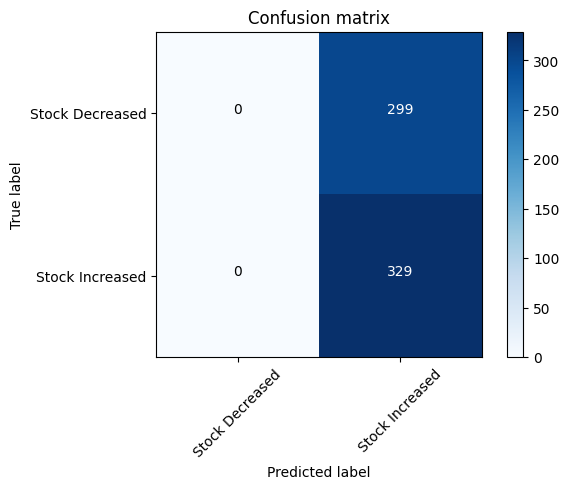

In [95]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Stock Decreased', 'Stock Increased'])

[[  0 299]
 [  0 329]]
0.5238853503184714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       299
           1       0.52      1.00      0.69       329

    accuracy                           0.52       628
   macro avg       0.26      0.50      0.34       628
weighted avg       0.27      0.52      0.36       628

Confusion matrix, without normalization


C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

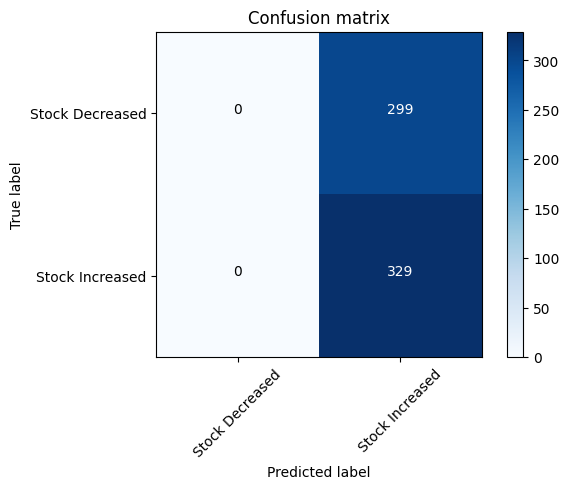

In [96]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Stock Decreased', 'Stock Increased'])

# MultinomialNB using Bag of Words

In [97]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(traindataset,train['Label'])

MultinomialNB()

[[ 96 203]
 [107 222]]
0.5063694267515924
              precision    recall  f1-score   support

           0       0.47      0.32      0.38       299
           1       0.52      0.67      0.59       329

    accuracy                           0.51       628
   macro avg       0.50      0.50      0.49       628
weighted avg       0.50      0.51      0.49       628

Confusion matrix, without normalization


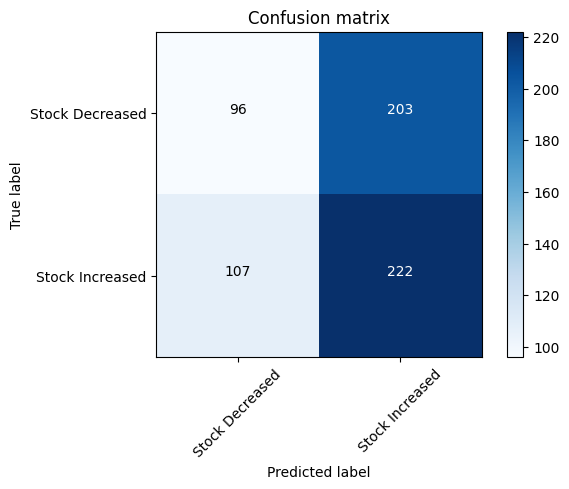

In [98]:
predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Stock Decreased', 'Stock Increased'])

# PassiveAggressiveClassifier using Bag of Words

In [99]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()
pa.fit(traindataset,train['Label'])

PassiveAggressiveClassifier()

[[ 77 222]
 [ 81 248]]
0.517515923566879
              precision    recall  f1-score   support

           0       0.49      0.26      0.34       299
           1       0.53      0.75      0.62       329

    accuracy                           0.52       628
   macro avg       0.51      0.51      0.48       628
weighted avg       0.51      0.52      0.49       628

Confusion matrix, without normalization


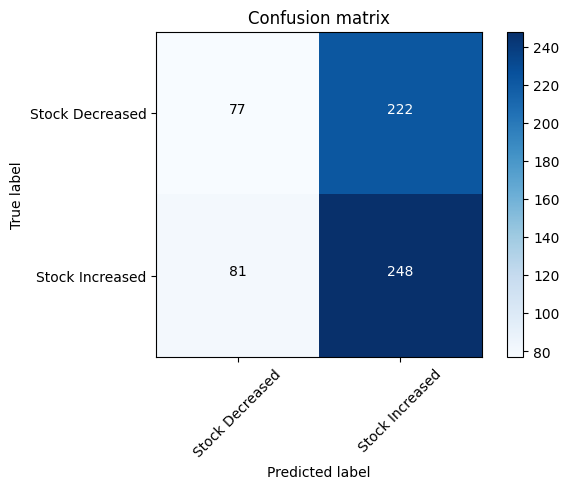

In [100]:
predictions = pa.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Stock Decreased', 'Stock Increased'])

# 2. Using TF-IDF

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
#implement TF-IDF
tfvector=TfidfVectorizer(ngram_range=(2,3))
train_df=tfvector.fit_transform(headlines)

# RandomForest Classifier Using TF-IDF

In [103]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(train_df,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [104]:
test_dataset = tfvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

[[ 14 285]
 [ 20 309]]
0.5143312101910829
              precision    recall  f1-score   support

           0       0.41      0.05      0.08       299
           1       0.52      0.94      0.67       329

    accuracy                           0.51       628
   macro avg       0.47      0.49      0.38       628
weighted avg       0.47      0.51      0.39       628

Confusion matrix, without normalization


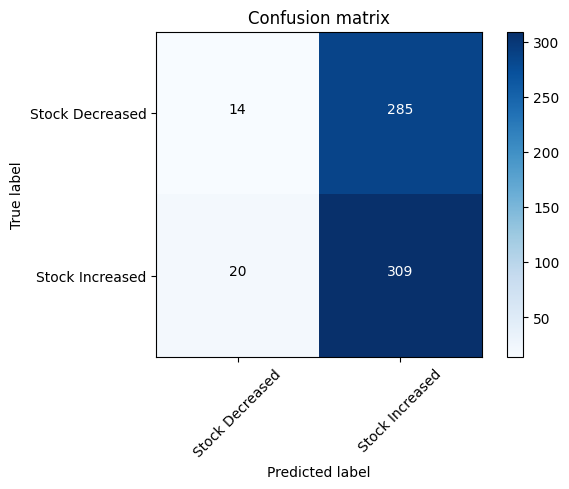

In [105]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Stock Decreased', 'Stock Increased'])

# MultinomialNB Using TF-IDF

In [106]:
nb=MultinomialNB()
nb.fit(train_df,train['Label'])

MultinomialNB()

[[  0 299]
 [  0 329]]
0.5238853503184714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       299
           1       0.52      1.00      0.69       329

    accuracy                           0.52       628
   macro avg       0.26      0.50      0.34       628
weighted avg       0.27      0.52      0.36       628

Confusion matrix, without normalization


C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

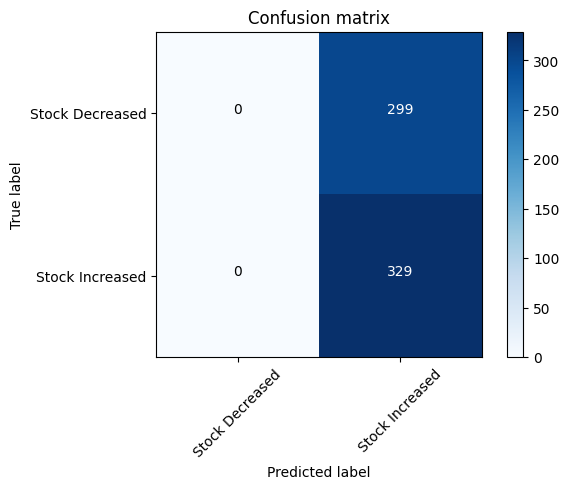

In [107]:
predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Stock Decreased', 'Stock Increased'])

# PassiveAggressiveClassifier using TF-IDF

In [108]:
pa = PassiveAggressiveClassifier()
pa.fit(train_df,train['Label'])

PassiveAggressiveClassifier()

[[ 40 259]
 [ 51 278]]
0.5063694267515924
              precision    recall  f1-score   support

           0       0.44      0.13      0.21       299
           1       0.52      0.84      0.64       329

    accuracy                           0.51       628
   macro avg       0.48      0.49      0.42       628
weighted avg       0.48      0.51      0.43       628

Confusion matrix, without normalization


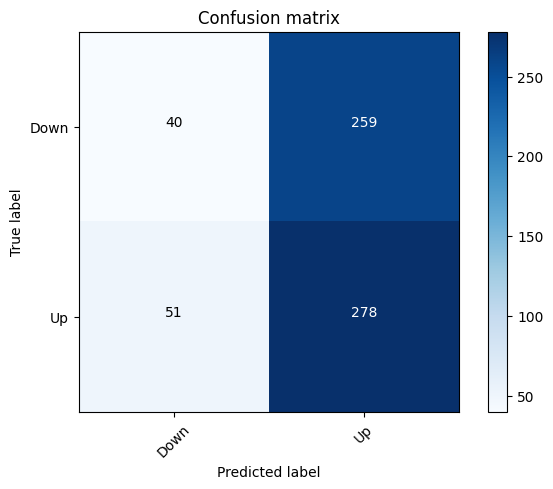

In [109]:
predictions = pa.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# End of Code